In [ ]:
#Project by :
#1. Varun Vinod vxv220005
#2. Kushagra Rastogi kxr220031
#3. Aditya Kiran Anasane aka220002
#4. Tanya Shahab txs220007


In [1]:
#imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
#loading data
data_dir = '<path>'

aisles = pd.read_csv(data_dir + 'aisles.csv')
departments = pd.read_csv(data_dir + 'departments.csv')
prior = pd.read_csv(data_dir + 'order_products__prior.csv')
train = pd.read_csv(data_dir + 'order_products__train.csv')
orders = pd.read_csv(data_dir + 'orders.csv')
products = pd.read_csv(data_dir + 'products.csv')



In [3]:
#merging data
#combinning prior and train df
orders_combined = pd.concat([prior,train],axis = 0)

#merging other df and orders_combined
df1=orders_combined.merge(products, how='left', on='product_id')
df2 = df1.merge(aisles, how='left', on='aisle_id')
df3 = df2.merge(departments, how='left', on='department_id')
data = df3.merge(orders, how='inner', on='order_id')

In [4]:
#release memory
del df1, df2, df3, orders_combined, aisles, departments, orders, prior, products, train

In [5]:
print(*list(data.columns), sep = '\n')

order_id
product_id
add_to_cart_order
reordered
product_name
aisle_id
department_id
aisle
department
user_id
eval_set
order_number
order_dow
order_hour_of_day
days_since_prior_order


In [6]:
print(data.department.unique())

['dairy eggs' 'produce' 'pantry' 'meat seafood' 'bakery' 'personal care'
 'snacks' 'breakfast' 'beverages' 'deli' 'household' 'international'
 'dry goods pasta' 'frozen' 'canned goods' 'babies' 'pets' 'alcohol'
 'bulk' 'missing' 'other']


In [7]:
data.aisle.unique()

array(['eggs', 'fresh vegetables', 'spices seasonings', 'oils vinegars',
       'baking ingredients', 'doughs gelatins bake mixes', 'spreads',
       'packaged vegetables fruits', 'yogurt', 'soy lactosefree',
       'poultry counter', 'bread', 'breakfast bakery', 'cold flu allergy',
       'energy granola bars', 'breakfast bars pastries', 'chips pretzels',
       'trail mix snack mix', 'crackers', 'refrigerated',
       'energy sports drinks', 'fresh fruits', 'salad dressing toppings',
       'prepared soups salads', 'milk', 'paper goods',
       'water seltzer sparkling water', 'kosher foods',
       'packaged poultry', 'packaged cheese', 'instant foods',
       'packaged produce', 'cookies cakes', 'candy chocolate',
       'body lotions soap', 'dry pasta', 'laundry',
       'air fresheners candles', 'frozen produce', 'buns rolls',
       'canned fruit applesauce', 'juice nectars', 'granola',
       'fresh herbs', 'baby food formula', 'canned meals beans', 'cream',
       'meat counte

In [8]:
data.product_name.unique()


array(['Organic Egg Whites', 'Michigan Organic Kale', 'Garlic Powder',
       ..., 'Ultra Sun Blossom Liquid 90 loads Fabric Enhancers',
       'Sweetart Jelly Beans', 'Water With Electrolytes'], dtype=object)

In [9]:
data[data['product_name'] == 'missing']

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order


In [10]:
data[data['department'] == 'missing']['department_id'].unique()

array([21], dtype=int64)

In [11]:
data[data['department_id'] == 21]['department'].unique()

array(['missing'], dtype=object)

In [12]:
data[data['aisle'] == 'missing']['aisle_id'].unique()

array([100], dtype=int64)

In [13]:
data[data['aisle_id'] == 100]['aisle'].unique()

array(['missing'], dtype=object)

In [14]:
missing_values = data[data['aisle'] == 'missing'].shape[0]
print("Records with missing Aisle and Department values :",missing_values)
print("")
print('Null values present:')
print("")
print(data.isna().sum())

Records with missing Aisle and Department values : 77396

Null values present:

order_id                        0
product_id                      0
add_to_cart_order               0
reordered                       0
product_name                    0
aisle_id                        0
department_id                   0
aisle                           0
department                      0
user_id                         0
eval_set                        0
order_number                    0
order_dow                       0
order_hour_of_day               0
days_since_prior_order    2078068
dtype: int64


In [15]:
print("NULL values:")
print('Distinct Customers =',data.user_id.nunique())
print('Distinct Orders =',data.order_id.nunique())
print('Distinct Aisles =',data.aisle_id.nunique())
print('Distinct Departments =',data.department_id.nunique())
print('Distinct Products =',data.product_id.nunique())


NULL values:
Distinct Customers = 206209
Distinct Orders = 3346083
Distinct Aisles = 134
Distinct Departments = 21
Distinct Products = 49685


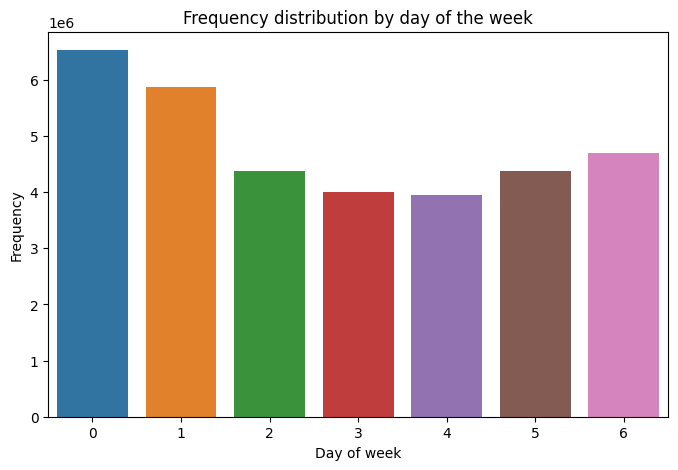

In [16]:
#exploratory data analysis
#orders
#most popular day of week 

plt.figure(figsize=(8,5))
sns.countplot(x="order_dow", data=data)
plt.ylabel("Frequency")
plt.xlabel("Day of week")
plt.title("Frequency distribution by day of the week")
plt.savefig("Frequency distribution of orders by day of the week.jpg")
plt.show()

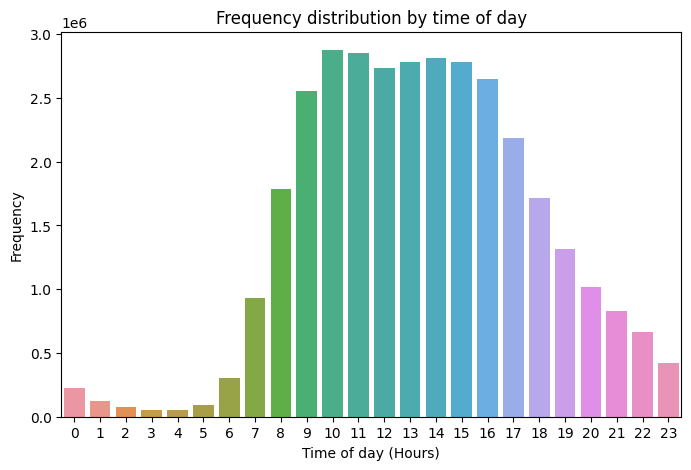

In [17]:
#most popular hour of day
plt.figure(figsize=(8,5))
sns.countplot(x="order_hour_of_day", data=data)
plt.ylabel("Frequency")
plt.xlabel("Time of day (Hours)")
plt.title("Frequency distribution by time of day")
plt.savefig("Frequency distribution by hour of day - Overall.jpg")
plt.show()

C:\Users\varun\AppData\Local\Temp\ipykernel_10548\2702657224.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  day_time_dist = day_time_dist.pivot('order_dow', 'order_hour_of_day', 'order_number')


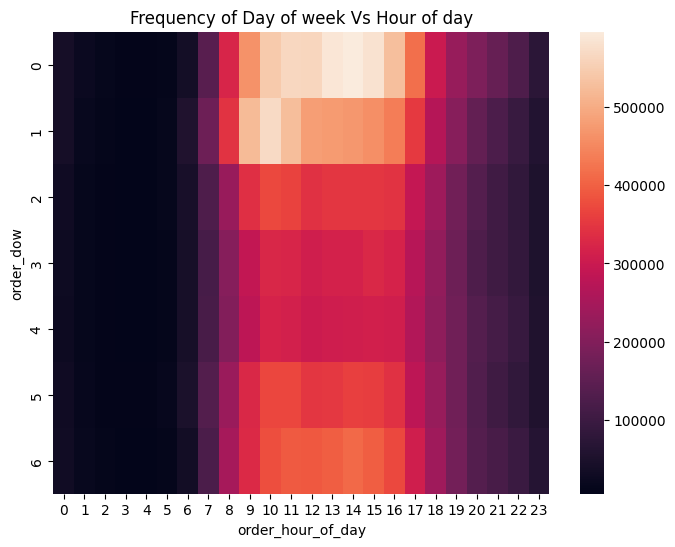

In [18]:
#heatmap pf orders by day of week and hour of day
day_time_dist = data.groupby(["order_dow", "order_hour_of_day"])["order_number"].aggregate("count").reset_index()
day_time_dist = day_time_dist.pivot('order_dow', 'order_hour_of_day', 'order_number')

plt.figure(figsize=(8,6))
sns.heatmap(day_time_dist)
plt.title("Frequency of Day of week Vs Hour of day")
plt.savefig("Frequency of Day of week Vs Hour of day.jpg")
plt.show()

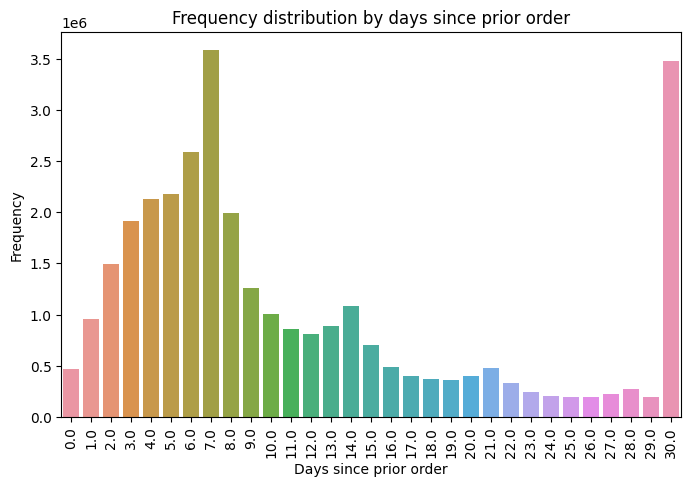

In [19]:
#freq distribution by days since prior order
plt.figure(figsize=(8,5))
sns.countplot(x="days_since_prior_order", data=data)
plt.ylabel('Frequency')
plt.xlabel('Days since prior order')
plt.xticks(rotation='vertical')
plt.title("Frequency distribution by days since prior order")
plt.savefig("Frequency distribution by days since prior order.jpg")
plt.show()

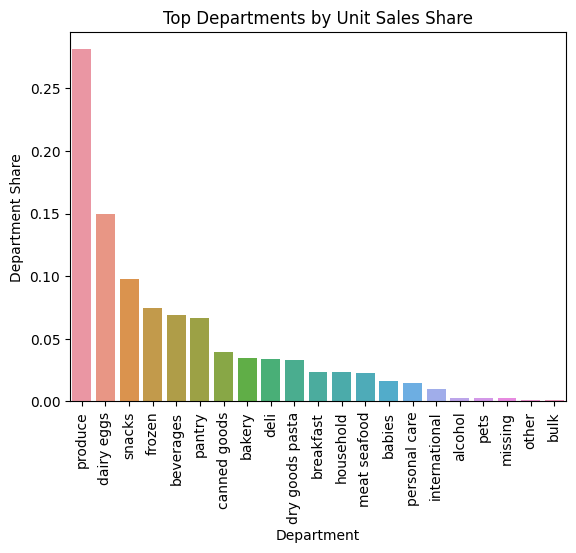

In [20]:
#deparmtents
#most popular department
dept_share = data.groupby('department')['add_to_cart_order'].sum().reset_index()
dept_share['department_share'] = dept_share['add_to_cart_order']/(dept_share['add_to_cart_order'].sum())

x = sns.barplot(data = dept_share.sort_values(by = 'department_share',ascending = False), x = 'department', y = 'department_share')
x.set_xticklabels(x.get_xticklabels(), rotation = 90)
x.set(xlabel = 'Department', ylabel = 'Department Share')
x.set_title("Top Departments by Unit Sales Share")
print("")
plt.savefig('Top Departments by Unit Sales Share.jpg', dpi=400, bbox_inches='tight')

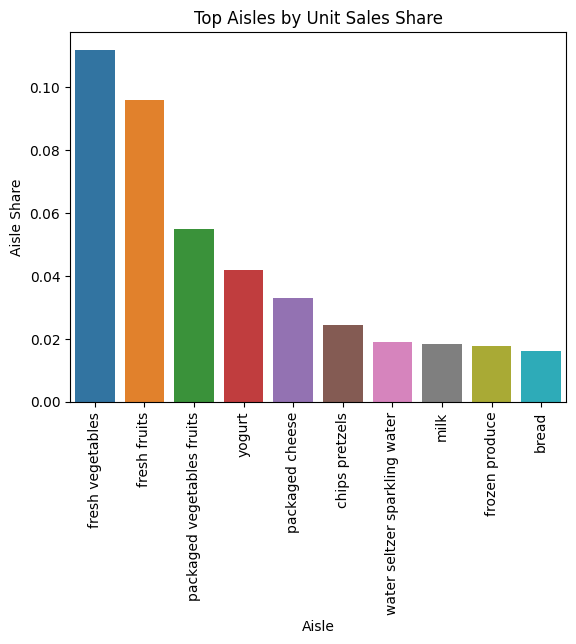

In [21]:
#aisles
aisle_share = data.groupby('aisle')['add_to_cart_order'].sum().reset_index()
aisle_share['aisle_share'] = aisle_share['add_to_cart_order']/ (aisle_share['add_to_cart_order'].sum())

x = sns.barplot(data = aisle_share.sort_values(by = 'aisle_share',ascending = False)[0:10], x = 'aisle', y = 'aisle_share')
x.set_xticklabels(x.get_xticklabels(), rotation = 90)
x.set(xlabel = 'Aisle', ylabel = 'Aisle Share')
x.set_title("Top Aisles by Unit Sales Share")
print("")
plt.savefig('Top Aisles by Units Sale Share.jpg', dpi=400, bbox_inches='tight')

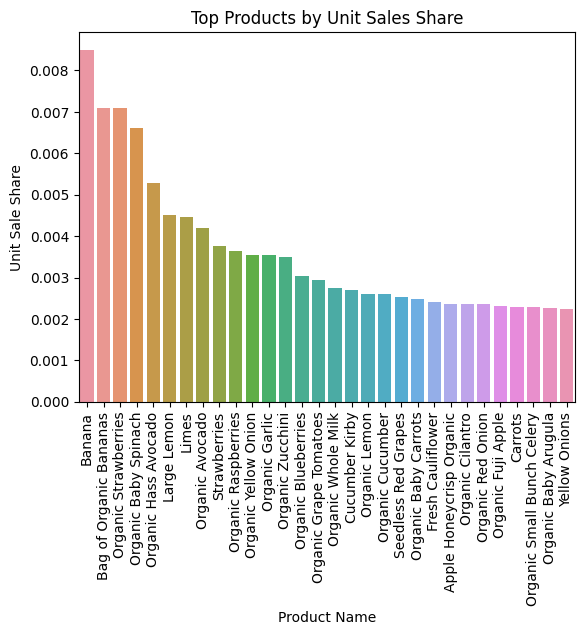

In [22]:
#products
prod_share = data.groupby('product_name')['add_to_cart_order'].sum().reset_index()
prod_share['product_share'] = prod_share['add_to_cart_order']/ (prod_share['add_to_cart_order'].sum())

x = sns.barplot(data = prod_share.sort_values(by = 'product_share',ascending = False)[0:30], 
                                              x = 'product_name', y = 'product_share')
x.set_xticklabels(x.get_xticklabels(), rotation = 90)
x.set(xlabel = 'Product Name', ylabel = 'Unit Sale Share')
x.set_title("Top Products by Unit Sales Share")
print("")
plt.savefig('Top Products by Units Sale Share.jpg', dpi=400, bbox_inches='tight')

In [23]:
## no. of products purchased per user at an aisle level
aisle_agg = data[['user_id','add_to_cart_order','aisle']].groupby(['user_id','aisle']).sum().reset_index()
## Volume purchased per user at a department level
dept_agg = data[['user_id','add_to_cart_order','department']].groupby(['user_id','department']).sum().reset_index()

# Total Volume purchased per user
user_vol = aisle_agg.groupby('user_id')['add_to_cart_order'].sum().reset_index().rename(columns = 
                                                                                            {'add_to_cart_order':'volume'})

## Merging total volume purchased per user with aisle level aggregations
aisle_agg = aisle_agg.merge(user_vol, how = 'inner', on = 'user_id') 

## Merging total volume purchased per user with department level aggregations
dept_agg = dept_agg.merge(user_vol, how = 'inner', on = 'user_id')

In [24]:
aisle_agg['aisle_share'] = aisle_agg['add_to_cart_order'] / aisle_agg['volume'] ## Computing the aisle share
dept_agg['dept_share'] = dept_agg['add_to_cart_order'] / dept_agg['volume'] ## Computing the department share

In [25]:
# Transforming the base table into a table wherein:
# Each row represents a customer
# And the columns represent the share bought from each aisle/department

aisle_vol_piv = aisle_agg[['user_id','aisle','add_to_cart_order']].pivot(index = 'user_id', columns = 'aisle', values = 'add_to_cart_order')
aisle_share_piv = aisle_agg[['user_id','aisle','aisle_share']].pivot(index = 'user_id', columns = 'aisle', values = 'aisle_share')

dept_vol_piv = dept_agg[['user_id','department','add_to_cart_order']].pivot(index = 'user_id', columns = 'department', values = 'add_to_cart_order')
dept_share_piv = dept_agg[['user_id','department','dept_share']].pivot(index = 'user_id', columns = 'department', values = 'dept_share')

## Substituting NA values with Zeroes
aisle_vol_piv = aisle_vol_piv.fillna(value = 0)
aisle_share_piv = aisle_share_piv.fillna(value = 0)
dept_vol_piv = dept_vol_piv.fillna(value = 0)
dept_share_piv = dept_share_piv.fillna(value = 0)

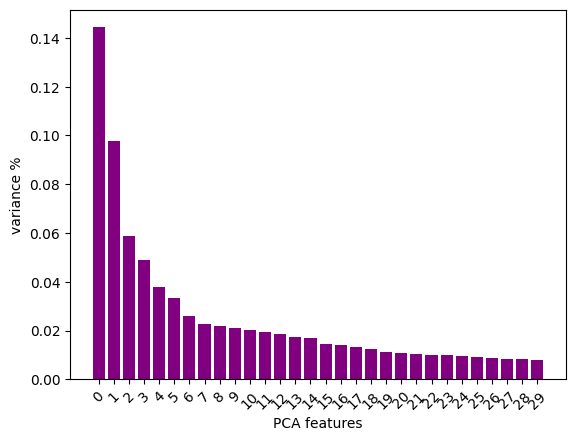

In [26]:
#pca for dimensionality reduction
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components = 30)
principalComponents = pca.fit_transform(aisle_share_piv)

features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color = 'purple')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
plt.xticks(rotation = 45)

PCA_components = pd.DataFrame(principalComponents)
plt.savefig('Variance % vs PCA Features.jpg', bbox_inches='tight')

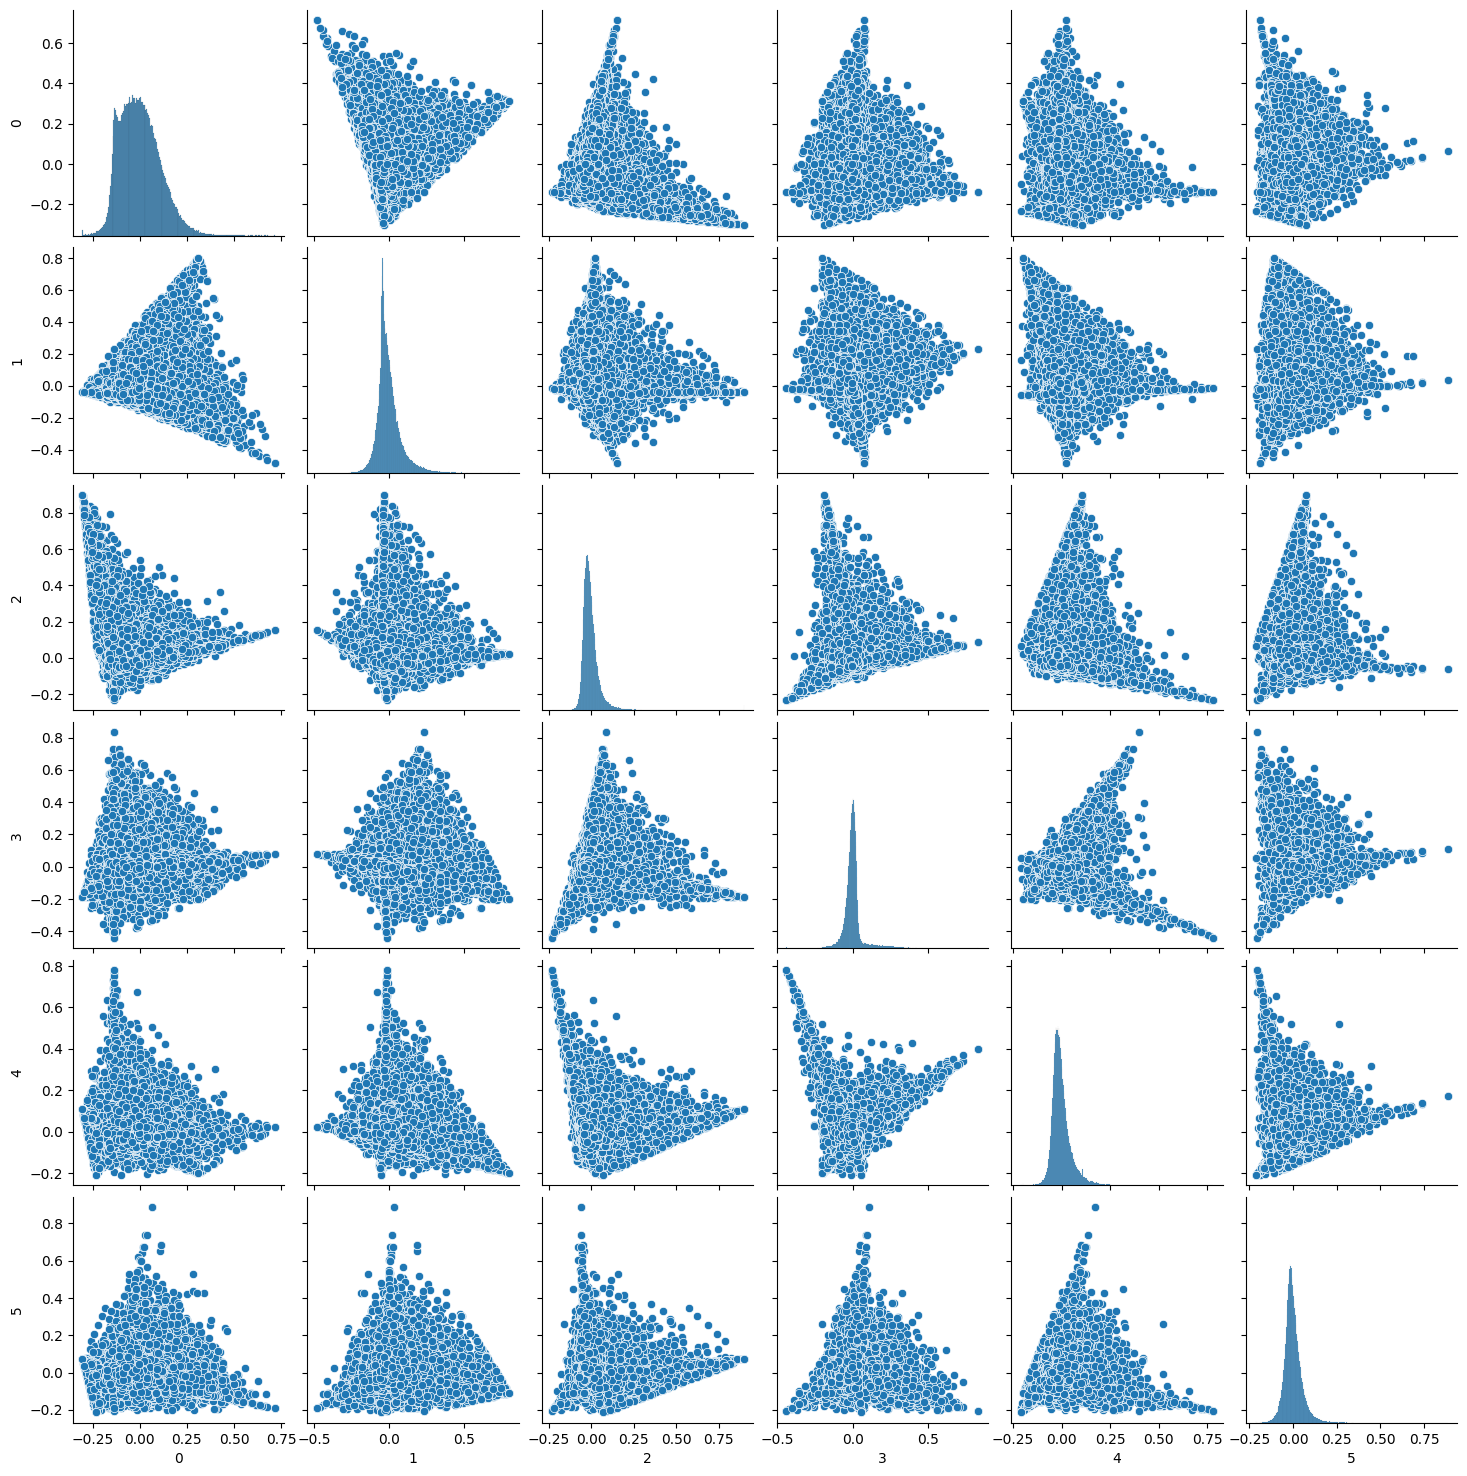

In [27]:
sns.pairplot(PCA_components[[0,1,2,3,4,5]])
print("")
plt.savefig('Pair Plot of PCA Components.jpg', bbox_inches='tight')

c:\Users\varun\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K-Means processed for k= 2



c:\Users\varun\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K-Means processed for k= 3



c:\Users\varun\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K-Means processed for k= 4



c:\Users\varun\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K-Means processed for k= 5



c:\Users\varun\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K-Means processed for k= 6



c:\Users\varun\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K-Means processed for k= 7



c:\Users\varun\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K-Means processed for k= 8



c:\Users\varun\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K-Means processed for k= 9



c:\Users\varun\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K-Means processed for k= 10



c:\Users\varun\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K-Means processed for k= 11



c:\Users\varun\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K-Means processed for k= 12



c:\Users\varun\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K-Means processed for k= 13



c:\Users\varun\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K-Means processed for k= 14



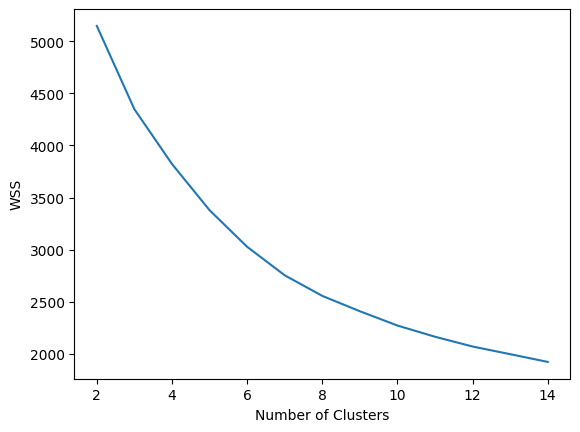

In [28]:
#kmeans clustering
from sklearn.cluster import KMeans
wss = {}
labels = {}
K = range(2,15)
for k in K:
    kmeans = KMeans(n_clusters = k).fit(PCA_components[[0,1,2,3,4,5]])
    wss[k] = kmeans.inertia_
    labels[k] = kmeans.labels_
    print("K-Means processed for k=",k)
    print("")
plt.figure()
plt.plot(list(wss.keys()), list(wss.values()))
plt.xlabel("Number of Clusters")
plt.ylabel("WSS")
plt.show()

In [29]:
centers = pd.DataFrame.from_dict(wss, orient='index').reset_index().rename(columns = {'index':'Clusters', 0:'WSS'})
centers

,Clusters,WSS
0,2,5147.563668
1,3,4347.795629
2,4,3822.505578
3,5,3378.760443
4,6,3027.398942
5,7,2753.909610
6,8,2556.141710
7,9,2408.881759
8,10,2271.626787
9,11,2163.959963


In [30]:
data.user_id.nunique()

206209

In [31]:
cluster_df = pd.concat([PCA_components[[0,1,2,3,4,5]],pd.Series(labels[6]).rename('cluster')], axis = 1)

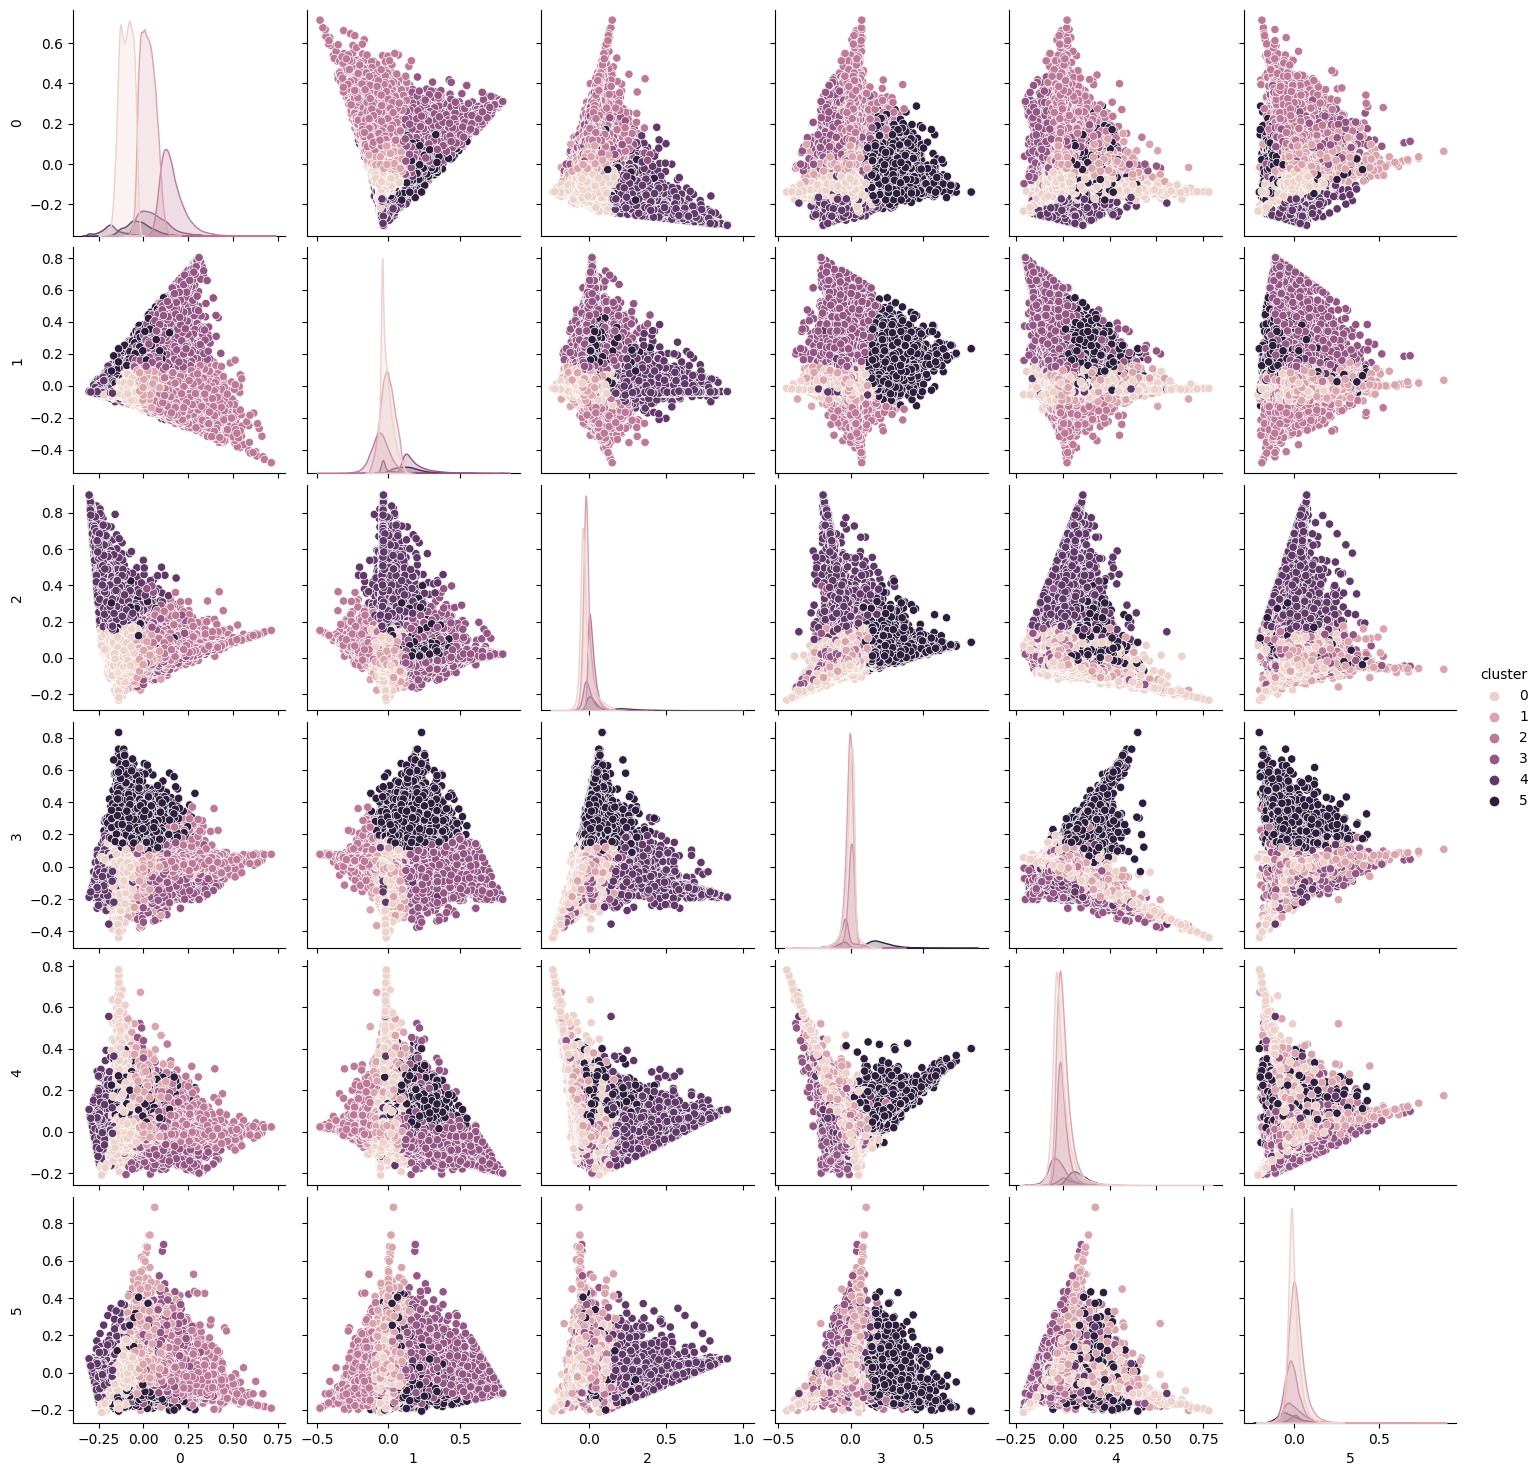

In [32]:
#6 PCA components
sns.pairplot(cluster_df, hue = 'cluster')
plt.savefig('Pair Plot of cluster_df.jpg', bbox_inches='tight')

In [33]:
#data prep
cluster_df = pd.concat([pd.Series(aisle_share_piv.index),cluster_df],axis = 1)

In [34]:
## Merging cluster dataframe with Aisle level aggregations to get the cluster label per user
aisle_agg = aisle_agg.merge(cluster_df[['user_id','cluster']], on = 'user_id').rename(columns = 
                                                                                        {'aisle_share':'user_aisle_share'})
aisle_agg

,user_id,aisle,add_to_cart_order,volume,user_aisle_share,cluster
0,1,candy chocolate,8,280,0.028571,0
1,1,cereal,26,280,0.092857,0
2,1,cream,17,280,0.060714,0
3,1,fresh fruits,30,280,0.107143,0
4,1,milk,9,280,0.032143,0
...,...,...,...,...,...,...
5919835,206209,soft drinks,26,912,0.028509,0
5919836,206209,soy lactosefree,20,912,0.021930,0
5919837,206209,spices seasonings,9,912,0.009868,0
5919838,206209,trash bags liners,6,912,0.006579,0


In [35]:
## Merging cluster dataframe with AiDepartmentsle level aggregations to get the cluster label per user 
dept_agg = dept_agg.merge(cluster_df, on = 'user_id').rename(columns ={'dept_share':'user_dept_share'})
dept_agg

,user_id,department,add_to_cart_order,volume,user_dept_share,0,1,2,3,4,5,cluster
0,1,beverages,35,280,0.125000,-0.103161,0.048617,-0.031837,-0.005640,-0.053015,-0.055238,0
1,1,breakfast,26,280,0.092857,-0.103161,0.048617,-0.031837,-0.005640,-0.053015,-0.055238,0
2,1,dairy eggs,76,280,0.271429,-0.103161,0.048617,-0.031837,-0.005640,-0.053015,-0.055238,0
3,1,household,14,280,0.050000,-0.103161,0.048617,-0.031837,-0.005640,-0.053015,-0.055238,0
4,1,pantry,5,280,0.017857,-0.103161,0.048617,-0.031837,-0.005640,-0.053015,-0.055238,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2281149,206209,international,11,912,0.012061,-0.072488,0.017515,-0.043593,-0.003229,-0.010476,0.027654,0
2281150,206209,meat seafood,18,912,0.019737,-0.072488,0.017515,-0.043593,-0.003229,-0.010476,0.027654,0
2281151,206209,pantry,75,912,0.082237,-0.072488,0.017515,-0.043593,-0.003229,-0.010476,0.027654,0
2281152,206209,produce,145,912,0.158991,-0.072488,0.017515,-0.043593,-0.003229,-0.010476,0.027654,0


In [36]:
dept_agg.drop([1,2,3,4,5,0], axis =1, inplace = True) ## Dropping irrelevant columns
dept_agg

,user_id,department,add_to_cart_order,volume,user_dept_share,cluster
0,1,beverages,35,280,0.125000,0
1,1,breakfast,26,280,0.092857,0
2,1,dairy eggs,76,280,0.271429,0
3,1,household,14,280,0.050000,0
4,1,pantry,5,280,0.017857,0
...,...,...,...,...,...,...
2281149,206209,international,11,912,0.012061,0
2281150,206209,meat seafood,18,912,0.019737,0
2281151,206209,pantry,75,912,0.082237,0
2281152,206209,produce,145,912,0.158991,0


In [37]:
dept_agg.cluster.unique()

array([0, 1, 3, 2, 4, 5])

In [38]:
## Creating a dataframe for heatmap 
cluster_aisle = pd.DataFrame(columns = ['aisle','add_to_cart_order','aisle_share','cluster'])
for i in range(0,6):
    x = aisle_agg[aisle_agg['cluster'] == i]
    x = x.groupby('aisle')['add_to_cart_order'].sum().reset_index()
    x['aisle_share'] = x['add_to_cart_order']
    x['aisle_share'] = x['aisle_share'].apply(lambda f: f / x['add_to_cart_order'].sum()) ## computing unit share per aisle 
    x['cluster'] = i
    cluster_aisle = pd.concat([x,cluster_aisle], axis = 0)

In [39]:
## Getting a list of top 20 aisles by aisle share
t20 = list(aisle_agg.groupby('aisle')['add_to_cart_order'].sum().sort_values(ascending = False)[0:20].index)

C:\Users\varun\AppData\Local\Temp\ipykernel_10548\2773427097.py:3: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  aisle_heat = aisle_heat.pivot(index = 'aisle', columns = 'cluster', values = 'aisle_share')


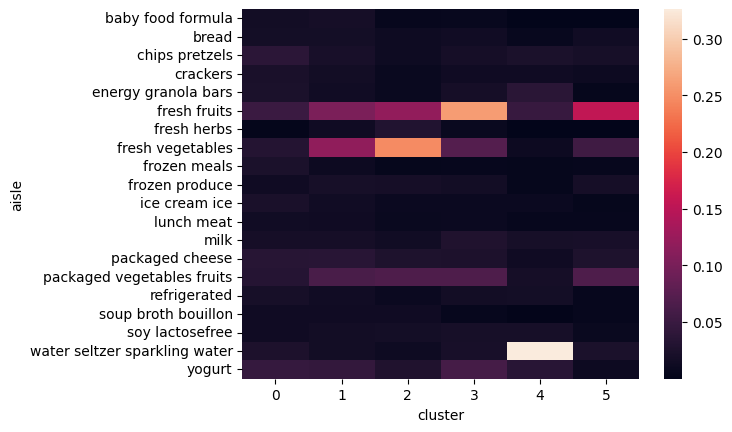

In [40]:
#heatmap illustrating the aisle share per cluster (top 20)
aisle_heat = cluster_aisle[cluster_aisle['aisle'].isin(t20)] ## Filtering for top 20 aisles
aisle_heat = aisle_heat.pivot(index = 'aisle', columns = 'cluster', values = 'aisle_share')
sns.heatmap(aisle_heat,cmap="rocket")
plt.savefig('Aisle vs Clusters Heatmap.jpg', bbox_inches='tight')
print("")

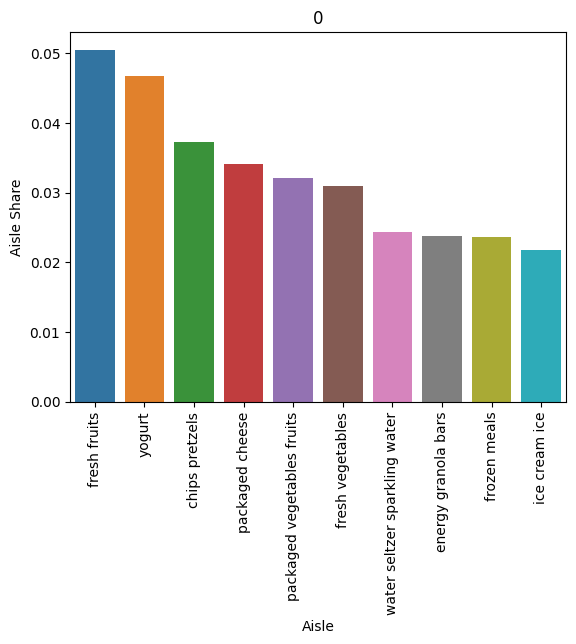

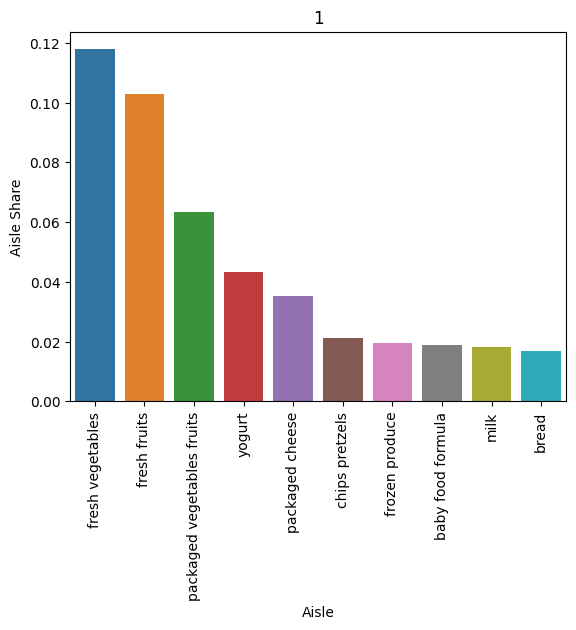

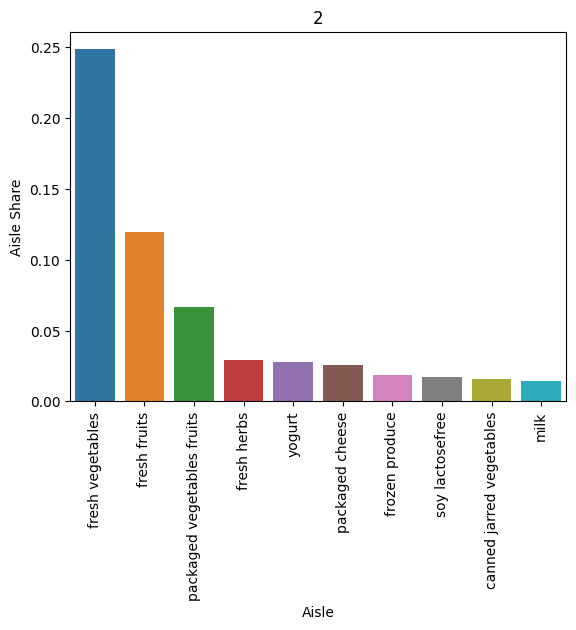

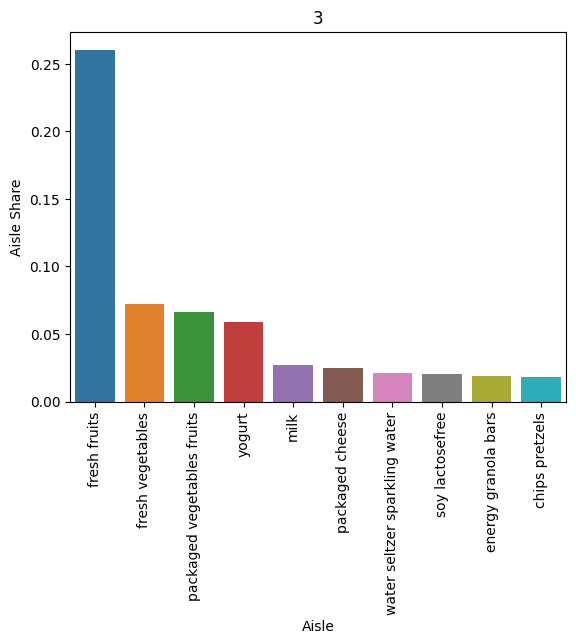

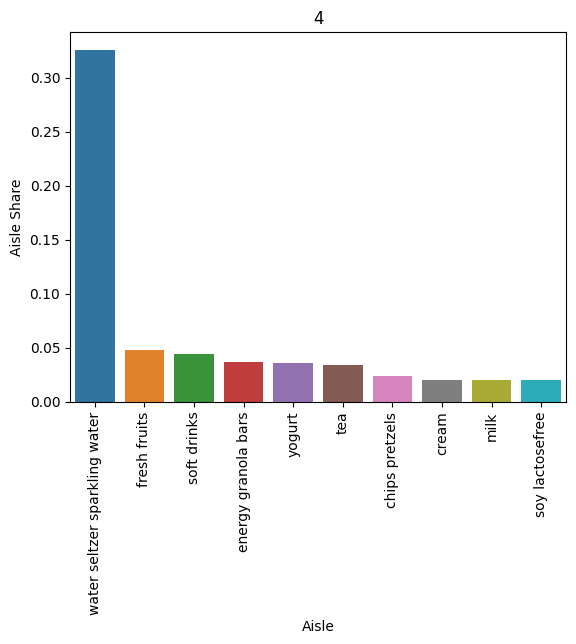

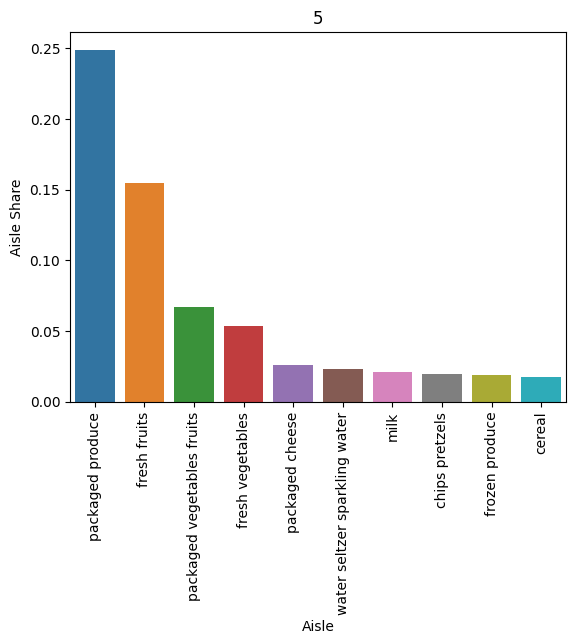

<Figure size 640x480 with 0 Axes>

In [41]:
for i in range(0,6):
    x = sns.barplot(data = cluster_aisle[cluster_aisle['cluster'] == i].sort_values('aisle_share', ascending = False)[0:10], x = 'aisle', y = 'aisle_share')
    x.set_xticklabels(x.get_xticklabels(), rotation=90)
    plt.title(str(i))
    x.set(xlabel = 'Aisle', ylabel = 'Aisle Share')
    plt.figure()
    plt.savefig("AisleCluster"+str(i)+".jpg", bbox_inches='tight')
    plt.clf()

In [42]:
# Computing User Share (% of users belonging to each cluster) and Unit Purchase Share (% of unit purchases wrt each cluster)

x = pd.concat([cluster_df['cluster'].value_counts().sort_index() / cluster_df['cluster'].value_counts().sum() * 100,
               cluster_aisle.groupby('cluster')['add_to_cart_order'].sum() / cluster_aisle['add_to_cart_order'].sum() * 100], axis = 1)

x.rename(columns = {'cluster':'User Share','add_to_cart_order':'Unit Purchase Share'})

,User Share,Unit Purchase Share
0,35.223487,29.178896
1,35.458685,49.584295
2,16.533226,16.744874
3,7.084560,3.346551
4,1.845700,0.361133
5,3.854342,0.784252


In [43]:
cluster_df.to_csv('cluster_df_new.csv') ##Writing to csv to use for cluster level analyses


**To predict if a product will be reordered or not (EXTRA CREDIT)**

In [44]:

## import necessary libraries
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# load the data
orders = pd.read_csv('orders.csv')
order_products_train = pd.read_csv('order_products__train.csv')
order_products_prior = pd.read_csv('order_products__prior.csv')
products = pd.read_csv('products.csv')


# merge the data
prior_orders = pd.merge(orders, order_products_prior, on='order_id')
train_orders = pd.merge(orders, order_products_train, on='order_id')
all_orders = pd.concat([prior_orders, train_orders], axis=0)


# select relevant features
features = ['user_id', 'product_id', 'order_dow', 'order_hour_of_day', 'days_since_prior_order']
X = all_orders[features]
y = all_orders['reordered']


# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train the XGBoost model
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)


# make predictions on the test set
y_pred = xgb_model.predict(X_test)


# evaluate the model's performance
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))

Accuracy: 0.6634976497016036
Precision: 0.650421813296836
Recall: 0.9286153991143158
F1 Score: 0.7650126380809197
